In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import scipy.stats as scp
from math import sqrt
import networkx as nx
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

# The Poissonization code

Poissonize the data on the toy network

In [2]:
def compute_support_uniform(x):
    """ Compute the support of the uniform distribution we'll draw from for a datapoint with value x. """
    # The uniform distribution has support [a, b]
    # It has mean x = (a + b)/2
    # It has variance x = (b - a)**2/12
    # We have a system of equations s.t. a = 2*x - b and b**2 - 2*b*x + x**2 - 3x = 0
    
    # Solve the system by computing 
    # A = 1, B = -2x, C = x**2 - 3x
    # We take the positive root
    if x==0:
        return((0,0))
    delta = 4*(x**2)-4*(x**2-3*x)
    b =( 2*x + sqrt(delta))/2
    a = 2*x - b
    #print(f" x vaut {x}, the mean of the distribution is {(a+b)/2} and its variance is {(b-a)**2/12}.")
    return((a,b))

In [3]:
def add_Poisson_noise(x):
    """ Add Poisson noise to a datapoint with value x.
    """
    (a,b) = compute_support_uniform(x)
    a = max(a, 0)
    new_point = np.random.uniform(low = a, high = b)
    return(new_point)

In [4]:
def poissonize_dataframe(df, col_list):
    """ Add Poisson noise to a dataframe. Acts in place. """
    for col in col_list:
        print(col)
        df[col] = np.vectorize(add_Poisson_noise)(df[col])

In [5]:
genes = ["PI3K", "Lck", "Akt", "GSK3b", "PKCt", "PDK1", "SHP1"]

In [6]:
expression_sc = pd.read_csv("../../CAR_data/log_expr_toy_data.csv", index_col=0)
expression_sc.index = [i for i in range(len(expression_sc))]

In [7]:
expression_sc

,PI3K,Lck,Akt,GSK3b,PKCt,PDK1,SHP1,Type,cell_type,CAR_Variant
0,0.396791,0.900622,0.548449,0.217948,0.000000,0.217948,0.396791,CD8,CD8 Cytox/Memory,h4-1BB_h4-1BB
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CD8,CD8 Effector A,h4-1BB_hIL15RA
2,0.000000,1.290507,0.719717,0.000000,0.423257,0.719717,0.719717,CD4,CD4 activated,hIL15RA_hCD28
3,0.000000,0.790086,0.000000,0.471124,0.000000,0.471124,0.471124,CD8,CD8 Effector HLAhigh,hIL15RA_hCTLA-4
4,0.000000,0.960528,0.000000,0.000000,0.000000,0.000000,0.164862,CD4,CD4 activated,hCTLA-4_hCD40
...,...,...,...,...,...,...,...,...,...,...
4746,0.401374,1.243976,0.000000,0.000000,0.401374,0.000000,0.401374,CD8,CD8 Effector HLAhigh,TCR-
4747,0.000000,1.908627,0.000000,1.069735,0.000000,0.000000,0.000000,CD8,CD8 Effector HLAhigh,TCR-
4748,1.253120,0.000000,0.000000,0.000000,0.000000,1.253120,0.000000,CD4,CD4 Memory,TCR-
4749,0.000000,1.215419,0.000000,0.465573,0.782006,0.465573,0.000000,CD8,CD8 Effector HLAhigh,TCR-


In [8]:
expression_noise = expression_sc.copy()
poissonize_dataframe(expression_noise, genes)
expression_noise

PI3K
Lck
Akt
GSK3b
PKCt
PDK1
SHP1


,PI3K,Lck,Akt,GSK3b,PKCt,PDK1,SHP1,Type,cell_type,CAR_Variant
0,1.198618,1.380175,1.313571,0.266408,0.000000,0.593765,0.631094,CD8,CD8 Cytox/Memory,h4-1BB_h4-1BB
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CD8,CD8 Effector A,h4-1BB_hIL15RA
2,0.000000,2.156780,0.469597,0.000000,0.566314,0.971853,0.995567,CD4,CD4 activated,hIL15RA_hCD28
3,0.000000,1.045554,0.000000,1.149938,0.000000,0.321615,0.290844,CD8,CD8 Effector HLAhigh,hIL15RA_hCTLA-4
4,0.000000,1.078562,0.000000,0.000000,0.000000,0.000000,0.392172,CD4,CD4 activated,hCTLA-4_hCD40
...,...,...,...,...,...,...,...,...,...,...
4746,1.087536,0.937034,0.000000,0.000000,0.579197,0.000000,1.319860,CD8,CD8 Effector HLAhigh,TCR-
4747,0.000000,2.204879,0.000000,2.512154,0.000000,0.000000,0.000000,CD8,CD8 Effector HLAhigh,TCR-
4748,2.933452,0.000000,0.000000,0.000000,0.000000,3.076348,0.000000,CD4,CD4 Memory,TCR-
4749,0.000000,2.555904,0.000000,1.580742,1.992929,1.598655,0.000000,CD8,CD8 Effector HLAhigh,TCR-


In [9]:
zero_PI3K = expression_noise[expression_noise["PI3K"] != 0]
zero_Lck = expression_noise[expression_noise["Lck"] != 0]
zero_PDK1 = expression_noise[expression_noise["PDK1"] != 0]
zero_Akt = expression_noise[expression_noise["Akt"] != 0]
zero_SHP1 = expression_noise[expression_noise["SHP1"] != 0]
zero_PKCt = expression_noise[expression_noise["PKCt"] != 0]
zero_GSK3b = expression_noise[expression_noise["GSK3b"] != 0]

In [10]:
toy_graph = nx.DiGraph()

toy_graph.add_node("PDK1")
toy_graph.add_node("PI3K")
toy_graph.add_node("Lck")
toy_graph.add_node("Akt")
toy_graph.add_node("SHP1")
toy_graph.add_node("PKCt")
toy_graph.add_node("GSK3b")

toy_graph.add_edge("PI3K", "PDK1", weight = 1)
toy_graph.add_edge("Lck", "PDK1", weight = 1)
toy_graph.add_edge("PDK1", "Akt", weight = 1)
toy_graph.add_edge("PDK1", "PKCt", weight = 1)
toy_graph.add_edge("SHP1", "PKCt", weight = -1)
toy_graph.add_edge("PKCt", "GSK3b", weight = 1)

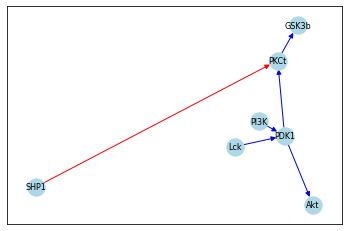

In [11]:
edge_color_scheme = { -1: "r", 1: "b"}

pos = nx.spring_layout(toy_graph)
edge_colors = [edge_color_scheme[toy_graph[u][v]["weight"]] for u, v in toy_graph.edges()]
nx.draw_networkx_edges(toy_graph, pos, edge_color=edge_colors)
nx.draw_networkx_labels(toy_graph, pos, font_size=8)
nx.draw_networkx_nodes(toy_graph, pos, node_color="lightblue")



# Plot to see whether a relationship appears

We are certain of those interactions, as they were extracted from the literature and we have the exact reference for those. As a check for our data, we will try to recover the child node information from the parent node information.

We will use two nodes:
   * PDK1 is the child node of PI3K and Lck
   * PKCt is the childnode of PDK1 and SHP1

## Step 1: plot the relationships with a relplot

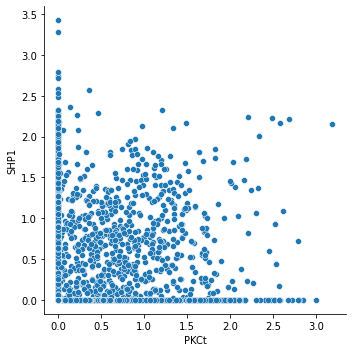

In [12]:
g = sns.relplot(
    data= zero_PDK1,
    x="PKCt", y="SHP1",
    height=5)



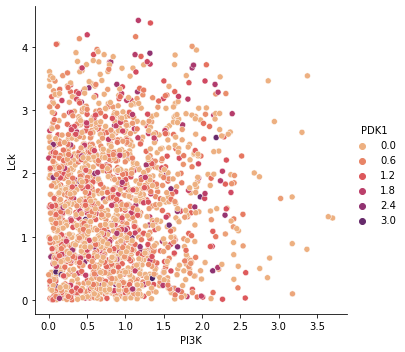

In [13]:
# PDK1 = PI3K or Lck

zero_PI3K_Lck = zero_PI3K[zero_PI3K["Lck"] != 0]

# Relplot
g = sns.relplot(
    data= zero_PI3K_Lck,
    x="PI3K", y="Lck", hue="PDK1",
    height=5, palette="flare")



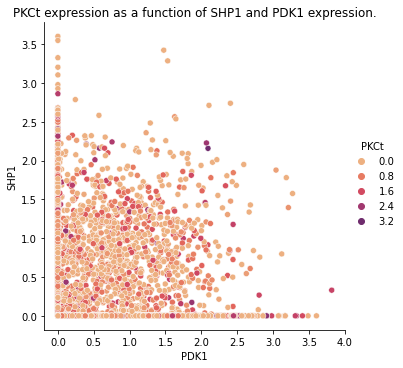

In [14]:
g = sns.relplot(
    data= expression_noise,
    x="PDK1", y="SHP1", hue="PKCt",
    height=5, palette="flare")
g.set(title = "PKCt expression as a function of SHP1 and PDK1 expression.")

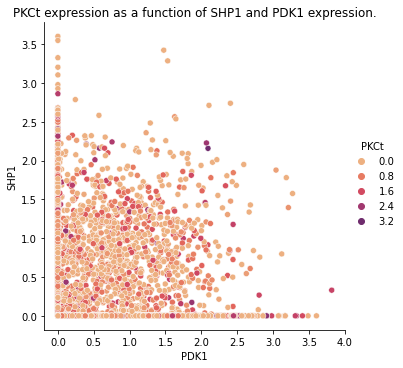

In [15]:
g = sns.relplot(
    data= expression_noise,
    x="PDK1", y="SHP1", hue="PKCt",
    height=5, palette="flare")
g.set(title = "PKCt expression as a function of SHP1 and PDK1 expression.")

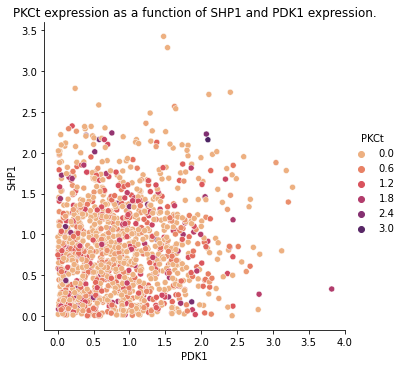

In [16]:
# PKCt = PDK1 or not SHP1
zero_PDK1_SHP1 = zero_PDK1[zero_PDK1["SHP1"] != 0]

# Relplot
g = sns.relplot(
    data= zero_PDK1_SHP1,
    x="PDK1", y="SHP1", hue="PKCt",
    height=5, palette="flare")
g.set(title = "PKCt expression as a function of SHP1 and PDK1 expression.")

In [17]:
# Kendall tau on log1p transformed expression with and without noise

expression_sc["PKCt"].corr(expression_sc["SHP1"], "kendall")

0.012785325543717682

In [18]:
expression_sc["PKCt"].corr(expression_sc["PDK1"], "kendall")

0.03903870161130808

In [19]:
expression_noise["PKCt"].corr(expression_noise["SHP1"], "kendall")

0.03723410381001803

In [20]:
expression_noise["PKCt"].corr(expression_noise["PDK1"], "kendall")

0.02337841910136151

No obvious tendencies seem to arise from those plots. Let us binarise the data and plot the discretized points.


In [15]:
zero_PDK1_SHP1["bin_PDK1"] = pd.cut(zero_PDK1_SHP1["PDK1"], 10, labels = False)
zero_PDK1_SHP1["bin_SHP1"] = pd.cut(zero_PDK1_SHP1["SHP1"], 10, labels = False)

zero_PI3K_Lck["bin_PI3K"] = pd.cut(zero_PDK1_SHP1["PI3K"], 10, labels = False)
zero_PI3K_Lck["bin_Lck"] = pd.cut(zero_PDK1_SHP1["Lck"], 10, labels = False)

/tmp/ipykernel_76264/541300753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_PDK1_SHP1["bin_PDK1"] = pd.cut(zero_PDK1_SHP1["PDK1"], 10, labels = False)
/tmp/ipykernel_76264/541300753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_PDK1_SHP1["bin_SHP1"] = pd.cut(zero_PDK1_SHP1["SHP1"], 10, labels = False)
/tmp/ipykernel_76264/541300753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [16]:
mean_PDK1_SHP1 = zero_PDK1_SHP1.groupby(["bin_PDK1", "bin_SHP1"]).mean().reset_index()
mean_PI3K_Lck = zero_PI3K_Lck.groupby(["bin_PI3K", "bin_Lck"]).mean().reset_index()

In [17]:
mean_PDK1_SHP1

,bin_PDK1,bin_SHP1,PI3K,Lck,Akt,GSK3b,PKCt,PDK1,SHP1
0,0,0,0.420894,1.555468,0.390907,0.494638,0.352728,0.208151,0.141656
1,0,1,0.439402,1.595137,0.416344,0.482331,0.466914,0.195377,0.467931
2,0,2,0.425561,1.487157,0.441436,0.459974,0.356637,0.227605,0.759285
3,0,3,0.285561,1.749379,0.545778,0.378122,0.329603,0.200073,1.043286
4,0,4,0.189166,1.242046,0.472549,0.348597,0.505830,0.197614,1.341969
...,...,...,...,...,...,...,...,...,...
66,7,5,0.959772,2.152821,1.007676,0.000000,0.494983,2.876740,1.669591
67,7,6,0.000000,1.749036,0.000000,0.000000,1.029157,3.116858,1.852987
68,8,1,0.000000,2.632587,0.000000,0.000000,0.000000,3.362637,0.560566
69,8,2,0.000000,0.093077,0.859855,0.601469,0.000000,3.411728,0.907951


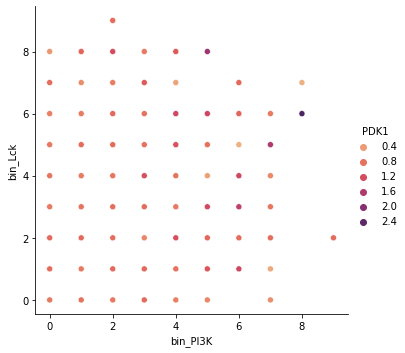

In [18]:
# PDK1 = PI3K or Lck
# Relplot
g = sns.relplot(
    data= mean_PI3K_Lck,
    x="bin_PI3K", y="bin_Lck", hue="PDK1",
    height=5, palette="flare")

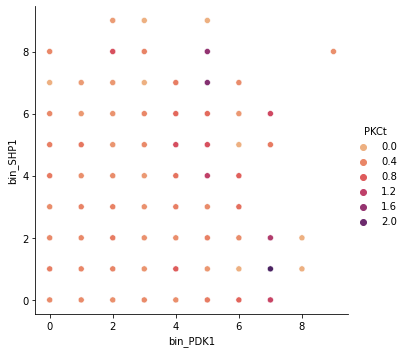

In [19]:
# PKCt = PDK1 or not SHP1
# Relplot
g = sns.relplot(
    data= mean_PDK1_SHP1,
    x="bin_PDK1", y="bin_SHP1", hue="PKCt",
    height=5, palette="flare")

## The same plot with read counts

In [20]:
raw_counts = pd.read_csv("../../CAR_data/raw_counts_post_qc_toy_data.csv")


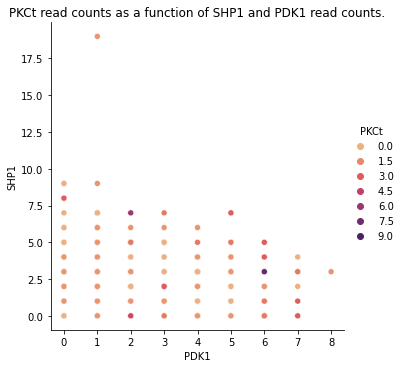

In [21]:
# Relplot
g = sns.relplot(
    data= raw_counts,
    x="PDK1", y="SHP1", hue="PKCt",
    height=5, palette="flare")
g.set(title = "PKCt read counts as a function of SHP1 and PDK1 read counts.")

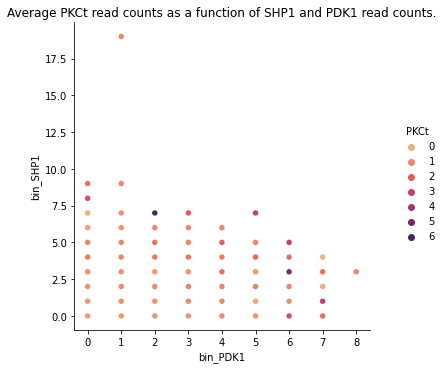

In [22]:
raw_counts["bin_PDK1"] = pd.cut(raw_counts["PDK1"], 9, labels = False)
raw_counts["bin_SHP1"] = pd.cut(raw_counts["SHP1"], 20, labels = False)

binned_PKCt = raw_counts.groupby(["bin_PDK1", "bin_SHP1"]).mean().reset_index()
g = sns.relplot(
    data= binned_PKCt,
    x="bin_PDK1", y="bin_SHP1", hue="PKCt",
    height=5, palette="flare")
g.set(title = "Average PKCt read counts as a function of SHP1 and PDK1 read counts.")

In [39]:
plt.rcParams["figure.figsize"] = (8,6)

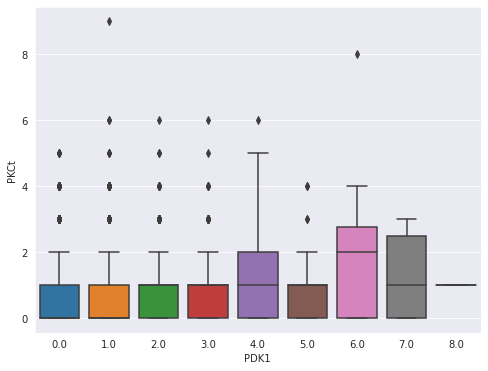

In [40]:
# The boxplots
sns.set_style("darkgrid")
g = sns.boxplot(
    data= raw_counts,
    x="PDK1", y="PKCt")

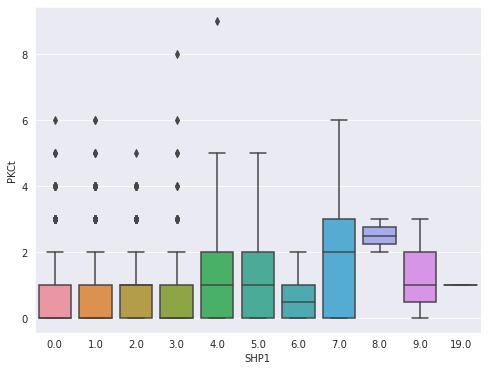

In [48]:
# The boxplots
sns.set_style("darkgrid")
g = sns.boxplot(
    data= raw_counts,
    x="SHP1", y="PKCt", fliersize=5)

In [49]:
# Kendall's Tau
print(raw_counts["PKCt"].corr(raw_counts["SHP1"], "kendall"))
print(raw_counts["PKCt"].corr(raw_counts["PDK1"], "kendall"))

0.11833677831439575
0.09817469520488137


In [25]:
plt.close("all")

## Correlation matrices

In [20]:
# Plot the correlation matrix

corr = zero_PDK1_SHP1[["PDK1", "SHP1", "PKCt"]].corr()
corr.style.background_gradient(cmap='bwr', vmin = -1, vmax = 1)

,PDK1,SHP1,PKCt
PDK1,1.000000,0.027861,-0.050508
SHP1,0.027861,1.000000,0.019033
PKCt,-0.050508,0.019033,1.000000


In [21]:
corr = zero_PI3K_Lck[["PDK1", "PI3K", "Lck"]].corr()
corr.style.background_gradient(cmap='bwr', vmin = -1, vmax = 1)

,PDK1,PI3K,Lck
PDK1,1.000000,0.030626,0.003675
PI3K,0.030626,1.000000,0.016587
Lck,0.003675,0.016587,1.000000


In [24]:
from scipy.stats import spearmanr
def calculate_Spearman_correlation(child_node, parent_node, dataframe, zeros): # zeros is a string: said or all 
    r, pval = spearmanr( a = dataframe[child_node],
                  b = dataframe[parent_node],
                  alternative = "two-sided")
    print(f"The Spearman correlation between {child_node} and its parent node {parent_node} when {zeros} parent node is nonzero is: \n {r} with a p-value of {pval}")

In [31]:
# Mutual information
from sklearn import feature_selection
print(feature_selection.mutual_info_classif(np.array(raw_counts["PDK1"]).reshape(-1, 1), np.ravel(np.array(raw_counts["PKCt"]).reshape(-1, 1)), discrete_features=True, random_state=1))
print(feature_selection.mutual_info_classif(np.array(raw_counts["SHP1"]).reshape(-1, 1), np.ravel(np.array(raw_counts["PKCt"]).reshape(-1, 1)), discrete_features=True, random_state=1))

[0.01294953]
[0.01865721]


In [23]:
calculate_Spearman_correlation("PKCt", "SHP1", zero_PDK1_SHP1, "all")
calculate_Spearman_correlation("PKCt", "PDK1", zero_PDK1_SHP1, "all")

The Spearman correlation between PKCt and its parent node SHP1 when all parent node is nonzero is: 
 0.0013684689785004329 with a p-value of 0.9595072949790211
The Spearman correlation between PKCt and its parent node PDK1 when all parent node is nonzero is: 
 -0.07827023667715889 with a p-value of 0.0036330260015175553


In [24]:
calculate_Spearman_correlation("PDK1", "PI3K", zero_PI3K_Lck, "all")
calculate_Spearman_correlation("PDK1", "Lck", zero_PI3K_Lck, "all")

The Spearman correlation between PDK1 and its parent node PI3K when all parent node is nonzero is: 
 0.0016902336740395303 with a p-value of 0.9417720643233004
The Spearman correlation between PDK1 and its parent node Lck when all parent node is nonzero is: 
 -0.01583051268104724 with a p-value of 0.49387928293694305


# Same thing with the initial data 

In [25]:
zero_bis_PDK1 = expression_sc[expression_sc["PDK1"]!= 0]
zero_bis_PDK1_SHP1 = zero_bis_PDK1[zero_bis_PDK1["SHP1"] != 0]

zero_bis_PI3K = expression_sc[expression_sc["PI3K"]!= 0]
zero_bis_PI3K_Lck = zero_bis_PI3K[zero_bis_PI3K["Lck"] != 0]

In [26]:
calculate_Spearman_correlation("PKCt", "SHP1", zero_bis_PDK1_SHP1, "all")
calculate_Spearman_correlation("PKCt", "PDK1", zero_bis_PDK1_SHP1, "all")

corr = zero_bis_PDK1_SHP1[["PDK1", "SHP1", "PKCt"]].corr()
corr.style.background_gradient(cmap='bwr', vmin = -1, vmax = 1)

The Spearman correlation between PKCt and its parent node SHP1 when all parent node is nonzero is: 
 -0.002224045305333746 with a p-value of 0.9342372836285282
The Spearman correlation between PKCt and its parent node PDK1 when all parent node is nonzero is: 
 0.05535272621064897 with a p-value of 0.0398568797836024


,PDK1,SHP1,PKCt
PDK1,1.000000,0.364056,0.115324
SHP1,0.364056,1.000000,0.056816
PKCt,0.115324,0.056816,1.000000


In [30]:
calculate_Spearman_correlation("PDK1", "PI3K", zero_bis_PI3K_Lck, "all")
calculate_Spearman_correlation("PDK1", "Lck", zero_bis_PI3K_Lck, "all")

corr = zero_bis_PI3K_Lck[["PDK1", "PI3K", "Lck"]].corr()
corr.style.background_gradient(cmap='bwr', vmin = -1, vmax = 1)

The Spearman correlation between PDK1 and its parent node PI3K when all parent node is nonzero is: 
 0.05199548832835437 with a p-value of 0.024545327957415947
The Spearman correlation between PDK1 and its parent node Lck when all parent node is nonzero is: 
 0.03119507347201651 with a p-value of 0.17752648420996642


,PDK1,PI3K,Lck
PDK1,1.000000,0.113130,0.054482
PI3K,0.113130,1.000000,0.232675
Lck,0.054482,0.232675,1.000000


# Try a random forest just in case

In [31]:
from sklearn.model_selection import train_test_split

In [55]:
rf_PDK1 = RandomForestRegressor()
rf_PKCt = RandomForestRegressor()

X_PKCt, X_test_PKCt = train_test_split(zero_PDK1_SHP1, test_size=0.2, random_state=22)
X_PDK1, X_test_PDK1 = train_test_split(zero_PI3K_Lck, test_size=0.2, random_state=22)


rf_PDK1.fit(X = X_PDK1[["PI3K", "Lck"]], y = X_PDK1["PDK1"])
rf_PKCt.fit(X = X_PKCt[["PDK1", "SHP1"]], y = X_PKCt["PKCt"])

y_pred_train_PDK1 = rf_PDK1.predict(X = X_PDK1[["PI3K", "Lck"]])
y_pred_test_PDK1 = rf_PDK1.predict(X = X_test_PDK1[["PI3K", "Lck"]])

y_pred_train_PKCt = rf_PKCt.predict(X = X_PKCt[["PDK1", "SHP1"]])
y_pred_test_PKCt = rf_PKCt.predict(X = X_test_PKCt[["PDK1", "SHP1"]])

score_train_PDK1 = r2_score(y_true = X_PDK1["PDK1"], y_pred = y_pred_train_PDK1)
score_test_PDK1 = r2_score(y_true = X_test_PDK1["PDK1"], y_pred = y_pred_test_PDK1 )

score_train_PKCt = r2_score(y_true = X_PKCt["PKCt"], y_pred = y_pred_train_PKCt)
score_test_PKCt = r2_score(y_true = X_test_PKCt["PKCt"], y_pred = y_pred_test_PKCt)



Text(0.5, 1.0, 'PDK1, train R2: 0.834572473784315, test R2: -0.2829464155958026')

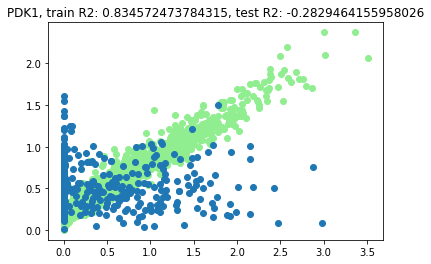

In [56]:
plt.scatter(x = X_PDK1["PDK1"], y = y_pred_train_PDK1, color = "lightgreen" )
plt.scatter(x = X_test_PDK1["PDK1"], y = y_pred_test_PDK1 )
plt.title(f"PDK1, train R2: {score_train_PDK1}, test R2: {score_test_PDK1}")


Text(0.5, 1.0, 'PCKt, train R2: 0.8278209510846926, test R2: -0.18190457643827385')

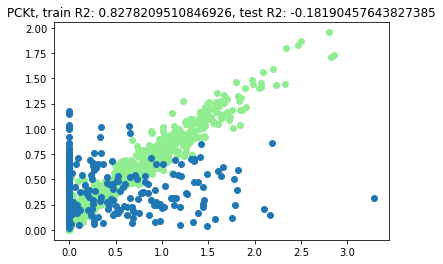

In [57]:
plt.scatter(x = X_PKCt["PKCt"], y = y_pred_train_PKCt, color = "lightgreen" )
plt.scatter(x = X_test_PKCt["PKCt"], y = y_pred_test_PKCt )
plt.title(f"PCKt, train R2: {score_train_PKCt}, test R2: {score_test_PKCt}")



There is an obvious overfitting. Let us try a grid search CV to fit that better.

In [58]:
from sklearn.model_selection import GridSearchCV

In [78]:
rf = RandomForestRegressor(random_state=2)
param_dict = {"max_depth" : [None, 1000, 500, 100], 
              "min_samples_split" : [2, 10, 50, 100],
             "min_samples_leaf" : [1, 10, 100, 500, 1000],
             "max_leaf_nodes" : [None, 3000, 1000, 500], 
             "ccp_alpha" : [0, 0.01, 0.1, 1, 5 ]}

grid3 = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    scoring="r2",
                    verbose=3,
                    return_train_score=True,
                    refit=True, 
                    cv = 2)
grid4 = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    scoring="r2",
                    verbose=3,
                    return_train_score=True,
                    refit=True, 
                    cv = 2)

In [79]:
grid3.fit(X = X_PDK1[["PI3K", "Lck"]], y = X_PDK1["PDK1"])

Fitting 2 folds for each of 1600 candidates, totalling 3200 fits
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=0.829, test=-0.111) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=0.835, test=-0.207) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=0.552, test=-0.063) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=0.553, test=-0.153) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=0.229, test=-0.006) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=0.223, test=-0.087) total ti

[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.226, test=-0.072) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.142, test=-0.014) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.154, test=-0.054) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.090, test=-0.007) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.107, test=-0.040) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=2;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, ma

[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=0.012, test=-0.005) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=

[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=0.829, test=-0.111) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=

[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.154, test=-0.066) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.215, test=-0.033) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.226, test=-0.072) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.215, test=-0.033) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.226, test=-0.072) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.142, test=-0.014) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_le

[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=0.012, test=-0.005) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=0.012, test=-0.005) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=0.012, test=-0.005) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=10

[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=

[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.553, test=-0.153) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.229, test=-0.006) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.223, test=-0.087) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.135, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.154, test=-0.066) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.215, test=-0.033) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=

[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.107, test=-0.040) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=0.012, test=-0.005) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=0.012, test=-0.005) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_lea

[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max

[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.830, test=-0.110) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.836, test=-0.204) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.552, test=-0.062) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.553, test=-0.153) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.229, test=-0.006) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes

[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.226, test=-0.072) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.142, test=-0.014) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.154, test=-0.054) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.090, test=-0.007) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.107, test=-0.040) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_

[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=0.012, test=-0.005) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_lea

[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.015, test=-0.000) total time=   0.3s
[CV 2/2] END 

[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.019, test=-0.011) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.007, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.015, test=-0.003) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.007, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.015, test=-0.003) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.006, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, m

[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=10;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=0.001, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=0.001, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.0

[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END

[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.014, test=-0.000) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.027, test=-0.011) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.010, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.019, test=-0.011) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.004, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.019, test=-0.011) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max

[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=50;, score=(train=0.015, test=-0.004) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=0.002, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=0.014, test=-0.004) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2;, score=(train=0.001, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=10;, score=(train=0.001, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, ma

[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha

[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.015, test=-0.000) total time=   0.3s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.029, test=-0.011) total time=   0.3s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.014, test=-0.000) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01,

[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=2;, score=(train=0.015, test=-0.003) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=10;, score=(train=0.007, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=10;, score=(train=0.015, test=-0.003) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=50;, score=(train=0.006, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=50;, score=(train=0.015, test=-0.004) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=0.002, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=5

[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=50;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=100;, score=(train=0.001, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=100;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.

[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp

[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=50;, score=(train=0.019, test=-0.011) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=100;, score=(train=0.004, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=100;, score=(train=0.019, test=-0.011) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=2;, score=(train=0.007, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=2;, score=(train=0.015, test=-0.003) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=10;, score=(train=0.007, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=100,

[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha

[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_al

[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.3s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.3s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=None

[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1

[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf

[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500,

[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=5

[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.3s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_no

[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, ma

[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100,

[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.3s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.3s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=None, m

[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=None

[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_dept

[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_dept

[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=1000, m

[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_dept

[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1

[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.3s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_no

[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, ma

[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_l

[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.3s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.3s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, ma

[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_l

[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_l

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=2),
             param_grid={'ccp_alpha': [0, 0.01, 0.1, 1, 5],
                         'max_depth': [None, 1000, 500, 100],
                         'max_leaf_nodes': [None, 3000, 1000, 500],
                         'min_samples_leaf': [1, 10, 100, 500, 1000],
                         'min_samples_split': [2, 10, 50, 100]},
             return_train_score=True, scoring='r2', verbose=3)

In [80]:
grid4.fit(X = X_PKCt[["PDK1", "SHP1"]], y = X_PKCt["PKCt"])

Fitting 2 folds for each of 1600 candidates, totalling 3200 fits
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=0.828, test=-0.191) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=0.833, test=-0.188) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=0.532, test=-0.098) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=0.554, test=-0.128) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=0.203, test=-0.026) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=0.244, test=-0.028) total ti

[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.219, test=-0.041) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.127, test=-0.024) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.140, test=-0.015) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.081, test=-0.016) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.093, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=2;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, ma

[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=0.007, test=-0.004) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=

[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=0.828, test=-0.191) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=

[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.169, test=-0.015) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.195, test=-0.049) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.219, test=-0.041) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.195, test=-0.049) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.219, test=-0.041) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.127, test=-0.024) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_le

[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=0.007, test=-0.004) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=0.007, test=-0.004) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=0.007, test=-0.004) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=10

[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=

[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.555, test=-0.128) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.203, test=-0.026) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.244, test=-0.028) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.119, test=-0.015) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.169, test=-0.015) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.195, test=-0.049) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=

[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.093, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=0.007, test=-0.004) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=0.007, test=-0.004) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_lea

[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=500, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=500, max

[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.828, test=-0.194) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.834, test=-0.185) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.533, test=-0.099) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.555, test=-0.128) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.203, test=-0.026) total time=   0.2s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes

[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.219, test=-0.041) total time=   0.2s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.127, test=-0.024) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.140, test=-0.015) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.081, test=-0.016) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=0.093, test=-0.002) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=0.016, test=-0.009) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_

[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=0.007, test=-0.004) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0, max_depth=100, max_lea

[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.038, test=0.000) total time=   0.2s
[CV 2/2] END c

[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.007, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.008, test=0.003) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.004, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.008, test=0.003) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=0.004, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=0.006, test=0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_dep

[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=0.002, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=0.002, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=None, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=

[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END

[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.022, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.007, test=0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.007, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.007, test=0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=0.007, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=0.008, test=0.003) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_dep

[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=0.002, test=0.000) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2;, score=(train=0.002, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=10;, score=(train=0.002, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=0.002, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, 

[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alp

[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.038, test=0.000) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.025, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.029, test=0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=0.022, test=-0.002) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=50;, score=(train=0.007, test=0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=5

[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=10;, score=(train=0.004, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=50;, score=(train=0.006, test=0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=50;, score=(train=0.002, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=0.006, test=0.002) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=0.002, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2;, score=(train=0.002, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=500,

[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=

[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=2;, score=(train=0.038, test=0.000) total time=   0.2s
[CV 2/2] END ccp_alp

[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=100;, score=(train=0.007, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=2;, score=(train=0.008, test=0.003) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=2;, score=(train=0.004, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=10;, score=(train=0.008, test=0.003) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=10;, score=(train=0.004, test=0.000) total time=   0.2s
[CV 1/2] END ccp_alpha=0.01, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=50;, score=(train=0.006, test=0.002) total time=   0.2s
[CV 2/2] END ccp_alpha=0.01, max_depth=100, max_

[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alph

[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_a

[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=

[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0

[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alp

[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth

[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_

[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, m

[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=500, max_leaf_nodes=500, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.

[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=0.1, max_dept

[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1,

[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=0.1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=0

[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=None, ma

[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=

[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_de

[CV 2/2] END ccp_alpha=1, max_depth=None, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max

[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=10

[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth

[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=

[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_lea

[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500

[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=500, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=500, m

[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_

[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, m

[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=1, max_depth=100, max_leaf_nodes=500, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=1, max_depth=100, max

[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=None, ma

[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=1000, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=No

[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=None, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=None,

[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=3000, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_

[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=1000, 

[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=1000, max_leaf_nodes=500, min_samples_leaf=500, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=100

[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=

[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_

[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=500, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=500, max_lea

[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=500, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=None, min_samples_leaf=1000, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=10

[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=3000, min_samples_leaf=1000, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=1000, min_samples_leaf=1, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_

[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=10;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=50;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=10, min_samples_split=100;, score=(train=-0.000, test=-0.001) total time=   0.2s
[CV 1/2] END ccp_alpha=5, max_depth=100, max_leaf_nodes=500, min_samples_leaf=100, min_samples_split=2;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END ccp_alpha=5, max_depth=100, max_leaf_

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=2),
             param_grid={'ccp_alpha': [0, 0.01, 0.1, 1, 5],
                         'max_depth': [None, 1000, 500, 100],
                         'max_leaf_nodes': [None, 3000, 1000, 500],
                         'min_samples_leaf': [1, 10, 100, 500, 1000],
                         'min_samples_split': [2, 10, 50, 100]},
             return_train_score=True, scoring='r2', verbose=3)

In [64]:
rf_PDK1 = MLPRegressor()
rf_PKCt = MLPRegressor()

X_PKCt, X_test_PKCt = train_test_split(zero_PDK1_SHP1, test_size=0.2, random_state=22)
X_PDK1, X_test_PDK1 = train_test_split(zero_PI3K_Lck, test_size=0.2, random_state=22)


rf_PDK1.fit(X = X_PDK1[["PI3K", "Lck"]], y = X_PDK1["PDK1"])
rf_PKCt.fit(X = X_PKCt[["PDK1", "SHP1"]], y = X_PKCt["PKCt"])

y_pred_train_PDK1 = rf_PDK1.predict(X = X_PDK1[["PI3K", "Lck"]])
y_pred_test_PDK1 = rf_PDK1.predict(X = X_test_PDK1[["PI3K", "Lck"]])

y_pred_train_PKCt = rf_PKCt.predict(X = X_PKCt[["PDK1", "SHP1"]])
y_pred_test_PKCt = rf_PKCt.predict(X = X_test_PKCt[["PDK1", "SHP1"]])

score_train_PDK1 = r2_score(y_true = X_PDK1["PDK1"], y_pred = y_pred_train_PDK1)
score_test_PDK1 = r2_score(y_true = X_test_PDK1["PDK1"], y_pred = y_pred_test_PDK1 )

score_train_PKCt = r2_score(y_true = X_PKCt["PKCt"], y_pred = y_pred_train_PKCt)
score_test_PKCt = r2_score(y_true = X_test_PKCt["PKCt"], y_pred = y_pred_test_PKCt)



Text(0.5, 1.0, 'PDK1, train R2: 0.0020105447264177068, test R2: -0.007009498663919089')

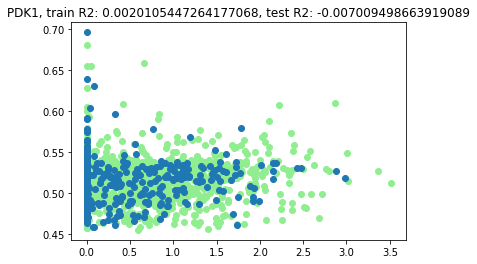

In [65]:
plt.scatter(x = X_PDK1["PDK1"], y = y_pred_train_PDK1, color = "lightgreen" )
plt.scatter(x = X_test_PDK1["PDK1"], y = y_pred_test_PDK1 )
plt.title(f"PDK1, train R2: {score_train_PDK1}, test R2: {score_test_PDK1}")


Text(0.5, 1.0, 'PCKt, train R2: 0.00569747859081593, test R2: -0.00035043400972889494')

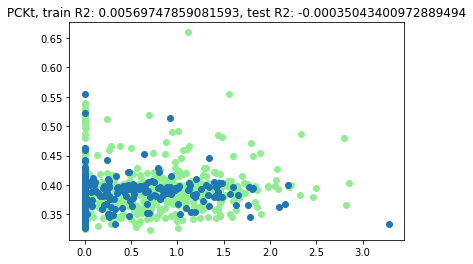

In [66]:
plt.scatter(x = X_PKCt["PKCt"], y = y_pred_train_PKCt, color = "lightgreen" )
plt.scatter(x = X_test_PKCt["PKCt"], y = y_pred_test_PKCt )
plt.title(f"PCKt, train R2: {score_train_PKCt}, test R2: {score_test_PKCt}")



In [74]:
rf = MLPRegressor(random_state=2)
param_dict = {"hidden_layer_sizes" : [(100,), (50,), (500), (1000,)], 
              "activation" : ["relu", "identity", "logistic", "tanh"],
             "alpha" : [ 0.01, 0.1, 1, 5, 10],
             "learning_rate_init" : [0.0001, 0.001, 0.01, 0.1]}

grid1 = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    scoring="r2",
                    verbose=3,
                    return_train_score=True,
                    refit=True, 
                    cv = 2)
grid2 = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    scoring="r2",
                    verbose=3,
                    return_train_score=True,
                    refit=True, 
                    cv = 2)

In [75]:
grid1.fit(X = X_PDK1[["PI3K", "Lck"]], y = X_PDK1["PDK1"])

Fitting 2 folds for each of 320 candidates, totalling 640 fits
[CV 1/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.033, test=-0.044) total time=   0.4s
[CV 2/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.029, test=-0.027) total time=   0.5s
[CV 1/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.006) total time=   0.1s
[CV 2/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.004, test=-0.006) total time=   0.1s
[CV 1/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.008, test=-0.007) total time=   0.1s
[CV 2/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.006, test=-0.005) total time=   0.1s
[CV 1/2] END activation=relu, alpha=0.01, hidde

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.006, test=-0.004) total time=   1.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.005, test=-0.008) total time=   1.1s
[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=-0.001, test=-0.007) total time=   1.0s
[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.001, test=-0.008) total time=   1.1s
[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.009, test=-0.004) total time=   0.6s
[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.008, test=-0.006) total time=   0.6s
[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.013, test=-0.015) total time=   0.6s
[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.005, t

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   1.7s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.014) total time=   1.7s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.032, test=-0.044) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.032, test=-0.028) total time=   0.5s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.003, test=-0.006) total time=   0.2s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.003, test=-0.004) total time=   0.1s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.004, test=-0.003) total time=   0.2s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.005, test=-0.004) total time=   0.2s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.008) total time=   0.2s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.000, test=-0.005) total t

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.002, test=-0.001) total time=   1.1s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.000, test=-0.000) total time=   1.0s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=-0.000, test=-0.006) total time=   1.2s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.003, test=-0.006) total time=   1.3s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.005, test=-0.004) total time=   1.6s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.006, test=-0.006) total time=   1.4s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.000, test=-0.011) total t

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.010) total time=   1.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.029, test=-0.042) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.037, test=-0.029) total time=   0.5s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.005) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.001) total time=   0.5s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.002, test=-0.003) total time=   0.2s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.001, test=-0.003) total time=   0.3s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.007) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.005, test=-0.001) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.006, test=-0.018) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.013, test=-0.009) total time=   0.4s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.002, test=-0.004) total time=   0.2s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.001, test=-0.001) total time=   0.2s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.001, test=-0.003) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.000, test=-0.000) total time=   0.1s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.002, test=-0.007) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.003, test=-0.011) total time=  

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.002, test=-0.006) total time=   1.6s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.002, test=-0.002) total time=   1.6s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.002, test=-0.003) total time=   1.0s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.002) total time=   1.0s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.002, test=-0.010) total time=   0.3s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.001, test=-0.000) total time=   0.3s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.000, test=-0.006) total time=   0.6s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.000, test=-0.003) total time=   0.6s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.002, test=-0.005) total time=   2.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.003, test=-0.002) total time=   2.8s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.002, test=-0.003) total time=   1.4s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.001, test=-0.000) total time=   1.7s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.008) total time=   0.5s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.004, test=-0.000) total time=   0.5s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.014, test=-0.026) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.024, test=-0.017

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.033, test=-0.048) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.041, test=-0.032) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.001, test=-0.006) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=-0.000, test=0.001) total time=   0.5s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.007) total time=   0.2s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.000, test=-0.003) total time=   0.2s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.004) total time=   0.1s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.003) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.008, test=-0.019) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.014, test=-0.010) total time=   0.4s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.002, test=-0.003) total time=   0.2s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.000, test=-0.000) total time=   0.2s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.001, test=-0.003) total time=   0.1s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.000) total time=   0.1s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.015, test=-0.004) total time=   0.1s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.002) total

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.001, test=-0.008) total time=   1.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.000, test=-0.000) total time=   1.6s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.005) total time=   0.8s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   0.8s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.014, test=-0.024) total time=   0.3s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.003, test=-0.012) total time=   0.3s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.004, test=-0.011) total time=   0.5s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.002, test=-0.009) total time=   0.4s

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.002, test=-0.007) total time=   2.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.000) total time=   2.8s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.001, test=-0.003) total time=   1.3s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   1.4s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total time=   0.6s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.001, test=0.000) total time=   0.6s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.000, test=-0.002) total time=   0.9s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.000, test=-0

[CV 1/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.001, test=-0.005) total time=   0.2s
[CV 2/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.000, test=-0.001) total time=   0.3s
[CV 1/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.002, test=-0.003) total time=   0.1s
[CV 2/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.001) total time=   0.1s
[CV 1/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.000, test=-0.007) total time=   0.1s
[CV 2/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.001, test=-0.002) total time=   0.1s
[CV 1/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.001) total time=   1.2s
[CV 2/2] END activation=identity, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.024, test=-0.031) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.028, test=-0.025) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.004) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.001, test=-0.000) total time=   0.3s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.000) total time=   0.2s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.000, test=-0.003) total time=   0.2s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.2s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.002, test=-0.010) total time=   0.1s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.044, test=-0.049) total time=   0.2s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.002, test=-0.004) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.001, test=-0.002) total time=   0.3s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.002, test=-0.002) total time=   0.2s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.000, test=-0.004) total time=   0.2s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.000, test=-0.005) total time=   0.1s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.000) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.002, test=-0.004) total time=   0.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.001, test=-0.001) total time=   0.8s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.004) total time=   0.6s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.001) total time=   0.6s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.008, test=-0.018) total time=   0.3s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total time=   0.3s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.002) total time=   0.6s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.007, test=-0.020) 

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.002, test=-0.003) total time=   1.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.001, test=-0.001) total time=   1.1s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.002, test=-0.003) total time=   0.9s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.001, test=-0.000) total time=   0.9s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.006, test=-0.015) total time=   0.3s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.000, test=0.001) total time=   0.4s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.002, test=-0.002) total time=   0.9s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.025, test=-0.033) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.029, test=-0.025) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.004) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=0.000) total time=   0.3s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.001, test=-0.004) total time=   0.2s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.2s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.000) total time=   0.2s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.002, test=-0.008) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.032, test=-0.037) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.033, test=-0.032) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.001, test=-0.005) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.000, test=-0.001) total time=   0.3s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.007) total time=   0.2s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=-0.000, test=-0.000) total time=   0.1s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.005) total time=   0.1s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.001) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.001, test=-0.005) total time=   0.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.000, test=-0.000) total time=   0.8s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.002) total time=   0.5s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.5s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.002, test=-0.010) total time=   0.2s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.002, test=-0.009) total time=   0.2s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.002) total time=   0.4s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.000, test=

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.001, test=-0.004) total time=   1.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=0.000) total time=   1.1s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.002, test=-0.002) total time=   0.7s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.000) total time=   0.8s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.006, test=-0.015) total time=   0.3s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.001, test=0.001) total time=   0.3s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.001, test=-0.002) total time=   0.7s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, 

[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.002, test=-0.002) total time=   0.3s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.000, test=-0.001) total time=   0.3s
[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.002, test=-0.002) total time=   0.2s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=-0.000, test=0.001) total time=   0.2s
[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.007, test=-0.018) total time=   0.3s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.007, test=-0.020) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.007) total time=   1.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.005) total time=   1.8s
[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.003) total time=   0.4s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.002) total time=   0.3s
[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=-0.001, test=-0.008) total time=   0.3s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=-0.004, test=-0.001) total time=   0.3s
[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.022, test=-0.010) total time=   0.9s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_ini

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.003, test=-0.007) total time=   3.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.002, test=-0.007) total time=   3.2s
[CV 1/2] END activation=logistic, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.001, test=-0.008) total time=   0.4s
[CV 2/2] END activation=logistic, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.002, test=0.002) total time=   0.4s
[CV 1/2] END activation=logistic, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.002) total time=   0.1s
[CV 2/2] END activation=logistic, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=-0.001, test=0.002) total time=   0.1s
[CV 1/2] END activation=logistic, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total time=   0.2s
[CV 2/2] END activation=logistic, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   3.2s
[CV 2/2] END activation=logistic, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.008) total time=   3.1s
[CV 1/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.007) total time=   0.4s
[CV 2/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.002, test=0.002) total time=   0.4s
[CV 1/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.001, test=-0.002) total time=   0.3s
[CV 2/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   0.3s
[CV 1/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(tr

[CV 1/2] END activation=logistic, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.003, test=-0.000) total time=   0.9s
[CV 2/2] END activation=logistic, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.000, test=-0.002) total time=   0.8s
[CV 1/2] END activation=logistic, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.001, test=-0.003) total time=   2.6s
[CV 2/2] END activation=logistic, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.002) total time=   2.9s
[CV 1/2] END activation=logistic, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=-0.001, test=-0.000) total time=   1.0s
[CV 2/2] END activation=logistic, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=-0.010, test=-0.003) total time=   2.0s
[CV 1/2] END activation=logistic, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, sco

[CV 1/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.003, test=-0.003) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.002, test=-0.008) total time=   0.1s
[CV 1/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.000, test=-0.005) total time=   0.5s
[CV 2/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.000, test=-0.001) total time=   0.7s
[CV 1/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.002, test=-0.003) total time=   0.3s
[CV 2/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.002) total time=   0.3s
[CV 1/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total tim

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.018, test=-0.030) total time=   0.7s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.026, test=-0.019) total time=   0.7s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.004) total time=   0.7s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=-0.000) total time=   0.7s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.001, test=-0.004) total time=   0.3s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.000, test=-0.004) total time=   0.3s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.001, test=-0.000) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.000, test=-0.000) total time=   0.2s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.022, test=-0.030) total time=   0.4s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.022, test=-0.019) total ti

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.002, test=-0.004) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.001, test=-0.002) total time=   0.4s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.001, test=-0.000) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.000, test=-0.000) total time=   0.2s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.1s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.000, test=-0.003) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.002, test=-0.004) total time=   2.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.001, test=-0.001) total time=   2.2s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.004) total time=   1.5s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.001) total time=   1.6s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.008, test=-0.019) total time=   0.8s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total time=   0.9s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.002) total time=   1.4s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.005, test=-0.016) total time=   1.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.002, test=-0.003) total time=   3.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.000) total time=   3.9s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.002, test=-0.003) total time=   2.9s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.001, test=-0.000) total time=   3.0s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.005, test=-0.015) total time=   1.0s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.001, test=0.001) total time=   1.0s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.001, test=-0.003) total time=   2.2s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.001, test=-0.002) t

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.019, test=-0.031) total time=   0.7s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.026, test=-0.018) total time=   0.7s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.004) total time=   0.6s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=-0.000) total time=   0.6s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.001, test=-0.005) total time=   0.3s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.3s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.000, test=-0.000) total time=   0.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.015, test=-0.023) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.018, test=-0.015) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.002, test=-0.005) total time=   0.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.000, test=-0.001) total time=   0.4s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.000, test=-0.000) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.2s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.000, test=-0.003) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.001, test=-0.005) total time=   2.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.000, test=-0.000) total time=   2.1s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.002) total time=   1.1s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   1.1s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.001, test=-0.009) total time=   0.6s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.002, test=-0.009) total time=   0.6s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.001, test=-0.006) total time=   1.2s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.002, test=-0.000) total time=   1.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.002, test=-0.004) total time=   3.9s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=0.000) total time=   3.9s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.002, test=-0.002) total time=   2.4s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.000) total time=   2.6s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.007, test=-0.016) total time=   1.0s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.001, test=0.001) total time=   1.1s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.001, test=-0.002) total time=   1.8s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.000, test=-0.

GridSearchCV(cv=2, estimator=MLPRegressor(random_state=2),
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'alpha': [0.01, 0.1, 1, 5, 10],
                         'hidden_layer_sizes': [(100,), (50,), 500, (1000,)],
                         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True, scoring='r2', verbose=3)

In [76]:
grid2.fit(X = X_PKCt[["PDK1", "SHP1"]], y = X_PKCt["PKCt"])

Fitting 2 folds for each of 320 candidates, totalling 640 fits
[CV 1/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.047, test=-0.033) total time=   0.4s
[CV 2/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.041, test=-0.065) total time=   0.3s
[CV 1/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.006, test=-0.004) total time=   0.1s
[CV 2/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.005, test=-0.004) total time=   0.1s
[CV 1/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.015, test=-0.018) total time=   0.1s
[CV 2/2] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.021, test=-0.023) total time=   0.1s
[CV 1/2] END activation=relu, alpha=0.01, hidde

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.004, test=-0.004) total time=   0.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.007, test=-0.008) total time=   0.9s
[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.003, test=-0.003) total time=   0.8s
[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=-0.003, test=-0.022) total time=   0.6s
[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.014, test=-0.006) total time=   0.5s
[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.014, test=-0.009) total time=   0.5s
[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.017, test=-0.015) total time=   0.6s
[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.020, t

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.002, test=-0.004) total time=   1.3s
[CV 2/2] END activation=relu, alpha=0.1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.082, test=-0.100) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.051, test=-0.037) total time=   0.4s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.040, test=-0.064) total time=   0.3s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.006, test=-0.005) total time=   0.1s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.004, test=-0.004) total time=   0.2s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.005, test=-0.004) total time=   0.1s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.003, test=-0.004) total time=   0.2s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.003, test=-0.003) tota

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.003, test=-0.003) total time=   0.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.002, test=-0.004) total time=   0.8s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.004, test=-0.003) total time=   0.9s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.002, test=-0.011) total time=   0.9s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.008, test=-0.005) total time=   0.9s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.007, test=-0.004) total time=   1.0s
[CV 1/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.005, test=-0.004) total time=   0.4s
[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.004, test=-0.003) tot

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.004, test=-0.009) total time=   1.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.056, test=-0.042) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.044, test=-0.065) total time=   0.3s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.003, test=-0.002) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=-0.000, test=-0.004) total time=   0.3s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.003, test=-0.002) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.006) total time=   0.1s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.000) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.022, test=-0.016) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.014, test=-0.034) total time=   0.3s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.002, test=-0.001) total time=   0.2s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.000, test=-0.004) total time=   0.2s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.001, test=-0.000) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.005) total time=   0.1s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.005) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.004) total time= 

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.006, test=-0.004) total time=   1.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.001, test=-0.004) total time=   1.1s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.003, test=-0.001) total time=   0.6s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.6s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.002, test=-0.002) total time=   0.2s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.000, test=-0.003) total time=   0.2s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.4s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.000, test=-0.002) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.005, test=-0.003) total time=   2.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.002, test=-0.004) total time=   2.1s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.003, test=-0.001) total time=   1.0s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.8s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.002, test=-0.001) total time=   0.3s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.000, test=-0.001) total time=   0.3s
[CV 1/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.021, test=-0.013) total time=   0.1s
[CV 2/2] END activation=relu, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.011, test=-0.015) 

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.059, test=-0.046) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.048, test=-0.069) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.001) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=-0.000, test=-0.005) total time=   0.3s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total time=   0.1s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.000, test=-0.001) total time=   0.2s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.000, test=-0.001) total time=   0.1s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.001, test=0.000) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.027, test=-0.017) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.018, test=-0.038) total time=   0.3s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.001, test=0.000) total time=   0.2s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.2s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total time=   0.1s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=-0.002, test=-0.005) total time=   0.1s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.004) total time=   0.1s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.000) total 

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.003, test=-0.003) total time=   1.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.001, test=-0.005) total time=   1.1s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.000) total time=   0.5s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   0.5s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total time=   0.2s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.003, test=-0.007) total time=   0.2s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.000, test=-0.000) total time=   0.3s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.000, test=-0.001) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.002, test=-0.002) total time=   2.0s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=-0.000, test=-0.006) total time=   2.0s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.002, test=-0.001) total time=   0.8s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   0.8s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.001, test=-0.001) total time=   0.3s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=-0.000, test=-0.000) total time=   0.5s
[CV 1/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.005, test=-0.002) total time=   0.1s
[CV 2/2] END activation=relu, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.003, test

[CV 1/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.002, test=-0.004) total time=   0.1s
[CV 2/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.002, test=-0.010) total time=   0.1s
[CV 1/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.003, test=-0.003) total time=   0.1s
[CV 2/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.003, test=-0.005) total time=   0.1s
[CV 2/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END activation=identity, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.0

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.004) total time=   0.9s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.033, test=-0.021) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.028, test=-0.053) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.003, test=-0.003) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.3s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.003, test=-0.002) total time=   0.1s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.004) total time=   0.1s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.1s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.004) total time=   0.1s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.068, test=-0.047) total time=   0.2s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.003, test=-0.003) total time=   0.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.000, test=-0.004) total time=   0.2s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.002, test=-0.002) total time=   0.1s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=-0.000, test=-0.003) total time=   0.1s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.1s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.000) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.003, test=-0.003) total time=   0.6s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.000, test=-0.003) total time=   0.6s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.003, test=-0.001) total time=   0.3s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.3s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.002, test=-0.003) total time=   0.3s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.000, test=-0.001) total time=   0.2s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.002, test=-0.002) total time=   0.3s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.000, test=-0.001) to

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.003, test=-0.003) total time=   0.9s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.004) total time=   0.9s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.003, test=-0.002) total time=   0.6s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   0.7s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.002, test=-0.001) total time=   0.3s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.2s
[CV 1/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.003, test=-0.002) total time=   0.5s
[CV 2/2] END activation=identity, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.033, test=-0.021) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.028, test=-0.053) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.003, test=-0.001) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.3s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.001, test=-0.000) total time=   0.1s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.000, test=-0.001) total time=   0.1s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.006, test=-0.004) total time=   0.1s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.004) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.057, test=-0.039) total time=   0.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.040, test=-0.066) total time=   0.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.002, test=-0.001) total time=   0.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=-0.000, test=-0.006) total time=   0.2s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.001, test=-0.002) total time=   0.1s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.1s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.000, test=-0.000) total time=   0.0s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.000) total time=   0.0s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.003, test=-0.002) total time=   0.6s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.000, test=-0.004) total time=   0.6s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.001) total time=   0.3s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=-0.000, test=-0.003) total time=   0.3s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.000, test=-0.000) total time=   0.3s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.000, test=-0.001) total time=   0.2s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   0.2s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.000, test=-0

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.003, test=-0.002) total time=   0.9s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.004) total time=   0.9s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.002, test=-0.000) total time=   0.5s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.5s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.001, test=-0.000) total time=   0.2s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.2s
[CV 1/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.002, test=-0.002) total time=   0.4s
[CV 2/2] END activation=identity, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, 

[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.002, test=-0.002) total time=   0.2s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.002, test=-0.002) total time=   0.2s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   0.2s
[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.000, test=-0.005) total time=   0.3s
[CV 2/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.066, test=-0.081) total time=   0.2s
[CV 1/2] END activation=logistic, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.000, test=-0.005) total time=   2.4s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, alpha=1, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=-0.006, test=-0.011) total time=   2.4s
[CV 1/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.006, test=-0.001) total time=   0.3s
[CV 2/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.003, test=-0.010) total time=   0.3s
[CV 1/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.001, test=-0.001) total time=   0.2s
[CV 2/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=-0.001) total time=   0.2s
[CV 1/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=-0.005, test=-0.002) total time=   0.2s
[CV 2/2] END activation=logistic, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.000) total time=   1.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=-0.001, test=-0.000) total time=   1.4s
[CV 1/2] END activation=logistic, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.003, test=-0.001) total time=   0.2s
[CV 2/2] END activation=logistic, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.034, test=-0.045) total time=   0.6s
[CV 1/2] END activation=logistic, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.000, test=-0.001) total time=   0.4s
[CV 2/2] END activation=logistic, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.000, test=-0.000) total time=   0.5s
[CV 1/2] END activation=logistic, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.001, test=-0.001) total time=   2.3s
[CV 2/2] END activation=logistic, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.

[CV 2/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=-0.003, test=-0.007) total time=   0.1s
[CV 1/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.004, test=-0.006) total time=   0.0s
[CV 2/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=-0.002, test=-0.002) total time=   0.0s
[CV 1/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.004, test=-0.003) total time=   0.0s
[CV 2/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.000) total time=   0.1s
[CV 1/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.002, test=-0.004) total time=   0.4s
[CV 2/2] END activation=tanh, alpha=0.1, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.003, test=-0.009) t

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.029, test=-0.021) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.027, test=-0.049) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.003, test=-0.003) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.5s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.002, test=-0.002) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=-0.001, test=-0.004) total time=   0.2s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=0.002, test=-0.001) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.005, test=-0.010) total time=   0.2s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.045, test=-0.034) total time=   0.3s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.039, test=-0.057) total 

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.003, test=-0.003) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=-0.000, test=-0.003) total time=   0.3s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.002, test=-0.001) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.2s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=0.000, test=-0.000) total time=   0.1s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.002) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.003, test=-0.003) total time=   1.6s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.000, test=-0.003) total time=   1.6s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.003, test=-0.001) total time=   0.8s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.8s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.002, test=-0.003) total time=   0.7s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=0.000, test=-0.001) total time=   0.5s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.003) total time=   1.0s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.000, test=-0.002) total time=   1.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.003, test=-0.003) total time=   2.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.003) total time=   2.8s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.003, test=-0.002) total time=   2.0s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.002) total time=   1.9s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.002, test=-0.001) total time=   0.8s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.6s
[CV 1/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.003, test=-0.002) total time=   1.6s
[CV 2/2] END activation=tanh, alpha=5, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.000, test=-0.001) to

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.030, test=-0.020) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001;, score=(train=-0.027, test=-0.049) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.002, test=-0.001) total time=   0.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   0.5s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.001, test=-0.000) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=(train=0.000, test=-0.001) total time=   0.2s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.002, test=-0.001) total time=   0.2s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=(train=-0.003, test=-0.007) total time=   0.2s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.037, test=-0.028) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.0001;, score=(train=-0.029, test=-0.045) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=0.002, test=-0.001) total time=   0.3s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.001;, score=(train=-0.000, test=-0.004) total time=   0.3s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=0.000, test=-0.000) total time=   0.1s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.01;, score=(train=-0.000, test=-0.002) total time=   0.2s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.001, test=-0.000) total time=   0.1s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), learning_rate_init=0.1;, score=(train=-0.000, test=-0.002) total time=   0.1s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=0.003, test=-0.002) total time=   1.5s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.0001;, score=(train=-0.000, test=-0.004) total time=   1.5s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=0.001, test=-0.001) total time=   0.7s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.001;, score=(train=-0.000, test=-0.003) total time=   0.6s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.000, test=-0.004) total time=   0.4s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.01;, score=(train=-0.008, test=-0.014) total time=   0.5s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=0.001, test=-0.000) total time=   0.4s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=500, learning_rate_init=0.1;, score=(train=-0.000, test=-0.002) total time=   0.6s

/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.003, test=-0.002) total time=   2.8s


/home/ubuntu/storage/miniconda3/envs/work/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.0001;, score=(train=0.000, test=-0.004) total time=   2.8s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.002, test=-0.000) total time=   1.6s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.001;, score=(train=0.000, test=-0.003) total time=   1.6s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.001, test=-0.000) total time=   0.8s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01;, score=(train=0.000, test=-0.002) total time=   0.6s
[CV 1/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.001, test=-0.001) total time=   1.2s
[CV 2/2] END activation=tanh, alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.1;, score=(train=0.000, test=-0.

GridSearchCV(cv=2, estimator=MLPRegressor(random_state=2),
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'alpha': [0.01, 0.1, 1, 5, 10],
                         'hidden_layer_sizes': [(100,), (50,), 500, (1000,)],
                         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True, scoring='r2', verbose=3)

In [77]:
print(grid1.best_estimator_)
print(grid1.best_score_)
print(grid2.best_estimator_)
print(grid2.best_score_)

MLPRegressor(alpha=10, hidden_layer_sizes=(1000,), learning_rate_init=0.01,
             random_state=2)
-0.00011293821152214001
MLPRegressor(activation='logistic', alpha=10, hidden_layer_sizes=500,
             random_state=2)
-0.00011099109100787263


In [81]:
print(grid3.best_estimator_)
print(grid3.best_score_)
print(grid4.best_estimator_)
print(grid4.best_score_)

RandomForestRegressor(ccp_alpha=0.01, min_samples_leaf=100, random_state=2)
-0.001940604041756333
RandomForestRegressor(ccp_alpha=0.01, min_samples_leaf=10, random_state=2)
0.001329758917007151
